<h1> Addition using Gated Recurrent Unit Cell </h1>

In [16]:
import numpy as np
from keras.layers import GRU, Dense, Dropout, Embedding, Reshape, Input
from keras.models import Sequential, Model
from keras.callbacks import TensorBoard

In [17]:
a = Input(shape=(1,2))
b = GRU(100)(a)
c= Dense(1)(b)
model = Model(inputs=a, outputs=c)

In [18]:
model.compile(optimizer="adam", loss="mse")
cb = TensorBoard(log_dir='./logs/addition_using_gru')

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 1, 2)              0         
_________________________________________________________________
gru_3 (GRU)                  (None, 100)               30900     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 31,001
Trainable params: 31,001
Non-trainable params: 0
_________________________________________________________________


In [20]:
x = np.random.rand(2,10000)

In [21]:
z = x[0] + x[1]

In [22]:
y = list(zip(x[0],x[1]))

In [23]:
y = np.array(y).reshape(10000,1,2)

model.fit(y,z, epochs=15, callbacks=[cb])

Epoch 1/15
10000/10000 [==============================] - 2s 185us/step - loss: 0.1002
Epoch 2/15
10000/10000 [==============================] - 1s 140us/step - loss: 0.0010
Epoch 3/15
10000/10000 [==============================] - 1s 141us/step - loss: 6.1829e-05
Epoch 4/15
10000/10000 [==============================] - 2s 225us/step - loss: 5.3094e-05
Epoch 5/15
10000/10000 [==============================] - 1s 148us/step - loss: 4.3277e-05
Epoch 6/15
10000/10000 [==============================] - 1s 147us/step - loss: 3.3689e-05
Epoch 7/15
10000/10000 [==============================] - 1s 141us/step - loss: 2.4443e-05
Epoch 8/15
10000/10000 [==============================] - 2s 163us/step - loss: 1.6562e-05
Epoch 9/15
10000/10000 [==============================] - 2s 166us/step - loss: 1.0226e-05
Epoch 10/15
10000/10000 [==============================] - 2s 187us/step - loss: 5.6703e-06
Epoch 11/15
10000/10000 [==============================] - 2s 156us/step - loss: 2.8527e-06
Epoch

In [24]:
y[:2]

array([[[0.2596434 , 0.25905312]],

       [[0.28664792, 0.55733697]]])

In [25]:
model.predict(np.array([[[1,1.2]]]))

array([[2.1916313]], dtype=float32)

In [26]:
model.weights

[<tf.Variable 'gru_3/kernel:0' shape=(2, 300) dtype=float32_ref>,
 <tf.Variable 'gru_3/recurrent_kernel:0' shape=(100, 300) dtype=float32_ref>,
 <tf.Variable 'gru_3/bias:0' shape=(300,) dtype=float32_ref>,
 <tf.Variable 'dense_3/kernel:0' shape=(100, 1) dtype=float32_ref>,
 <tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32_ref>]

In [27]:
model.predict(np.array([[[0.40,0.45]]]))

array([[0.8494749]], dtype=float32)

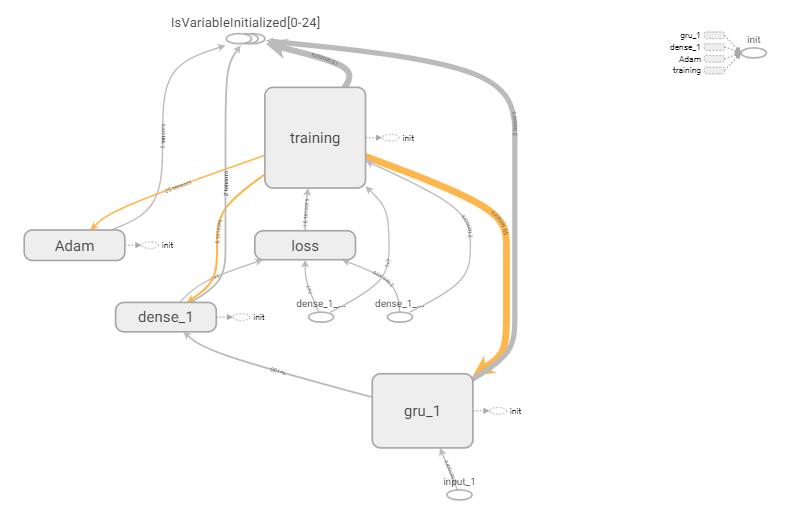

In [28]:
from IPython.core.display import Image
Image(filename="./images/addition_using_gru.PNG")

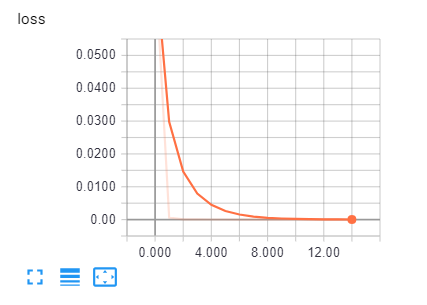

In [29]:
Image(filename="images/addition_using_gru_loss.PNG")